<a href="https://colab.research.google.com/github/taynarabezzon/Imers-o_Dados_Python_Alura/blob/main/Imersao_data_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploração, Limpeza e Preparação de Dados** - Aula 2

In [117]:
import pandas as pd

In [118]:
df = pd.read_csv('https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv')

In [119]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [121]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [122]:
df.shape

(133349, 11)

In [123]:
linhas, colunas = df.shape[0], df.shape[1]

In [124]:
print('linhas:', linhas)
print('colunas:', colunas)

linhas: 133349
colunas: 11


In [125]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [126]:
df.columns = ['ano', 'senioridade', 'contrato', 'cargo',
              'salario', 'moeda', 'usd', 'residencia',
              'remoto', 'empresa', 'tamanho_empresa']

print('Colunas traduzidas:')
display(df.columns)

Colunas traduzidas:


Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')

In [127]:
df['senioridade'].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [128]:
df['contrato'].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [129]:
df['remoto'].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [130]:
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [131]:
senioridade = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'

}

df['senioridade'] = df['senioridade'].replace(senioridade)
df['senioridade'].value_counts()

,count
senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [132]:
contrato = {
    'FT': 'Tempo Integral',
    'CT': 'Contrato por Tempo',
    'PT': 'Tempo Parcial',
    'FL': 'Freelance'
}
df['contrato'] = df['contrato'].map(contrato)

display(df['contrato'].value_counts())

,count
contrato,
Tempo Integral,132563
Contrato por Tempo,394
Tempo Parcial,376
Freelance,16


In [133]:
tamanho_empresa = {
    'M': 'Média',
    'L': 'Grande',
    'S': 'Pequena',
}
df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)

display(df['tamanho_empresa'].value_counts())

,count
tamanho_empresa,
Média,129561
Grande,3574
Pequena,214


In [134]:
remoto = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto',
}
df['remoto'] = df['remoto'].replace(remoto)

df['remoto'].value_counts()

,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [135]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [136]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [137]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [138]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [139]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [140]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Média
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Média
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Média
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Média
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Média
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Média
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Média
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [141]:
import numpy as np

In [142]:
df_salarios = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
})

In [143]:
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

In [144]:
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())
df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [145]:
df_temperaturas = pd.DataFrame({
    'Dia': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'],
    'Temperatura': [30, np.nan, np.nan, 28,27]

})

In [146]:
df_temperaturas['Preenchido_ffill'] = df_temperaturas['Temperatura'].fillna(method='ffill')
df_temperaturas['Preenchido_bfill'] = df_temperaturas['Temperatura'].fillna(method='bfill')
df_temperaturas

/tmp/ipython-input-3346741709.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipython-input-3346741709.py:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,Dia,Temperatura,Preenchido_ffill,Preenchido_bfill
0,Segunda,30.0,30.0,30.0
1,Terça,NaN,30.0,28.0
2,Quarta,NaN,30.0,28.0
3,Quinta,28.0,28.0,28.0
4,Sexta,27.0,27.0,27.0


In [147]:
df_cidades = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'cidades': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Belém']
})

df_cidades['cidades_preenchidas'] = df_cidades['cidades'].fillna('Não Informado')
df_cidades

,nome,cidades,cidades_preenchidas
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não Informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não Informado
4,Val,Belém,Belém


In [148]:
df_limpo = df.dropna()
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [149]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [150]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [151]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

In [152]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [153]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  object
 9   empresa          133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


**Criação de Gráficos e Storytelling com Dados** - Aula 3

<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

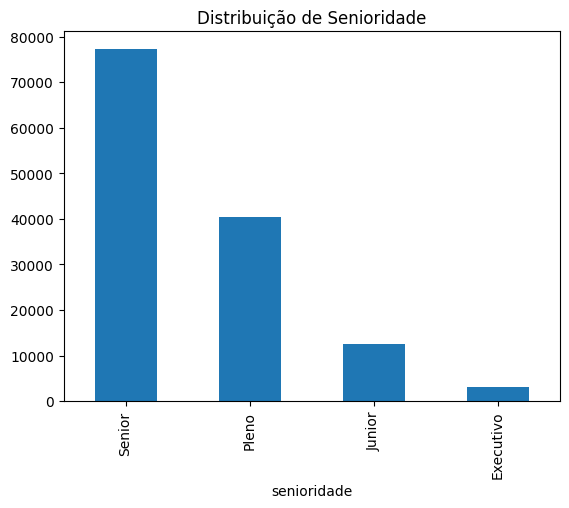

In [154]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title = 'Distribuição de Senioridade')

In [155]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

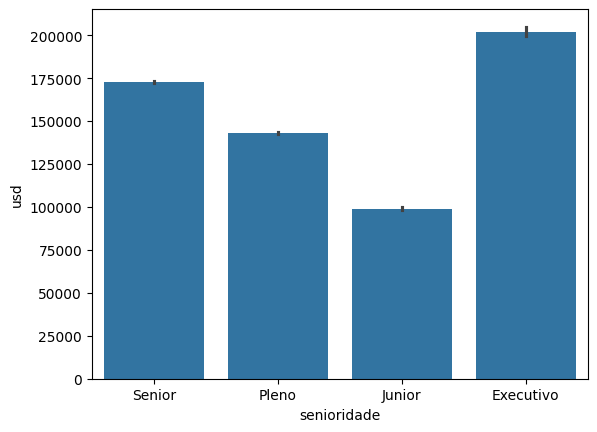

In [156]:
sns.barplot(data=df_limpo, x='senioridade', y='usd')

In [157]:
import matplotlib.pyplot as plt

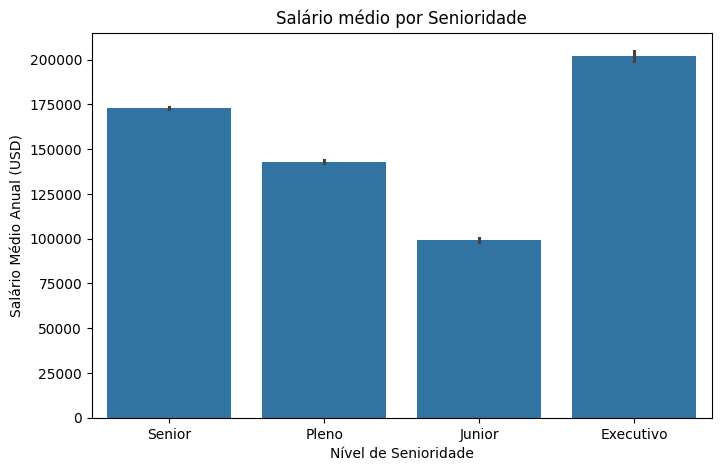

In [158]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.title('Salário médio por Senioridade')
plt.xlabel('Nível de Senioridade')
plt.ylabel('Salário Médio Anual (USD)')
plt.show()

In [159]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index
ordem

Index(['Executivo', 'Senior', 'Pleno', 'Junior'], dtype='object', name='senioridade')

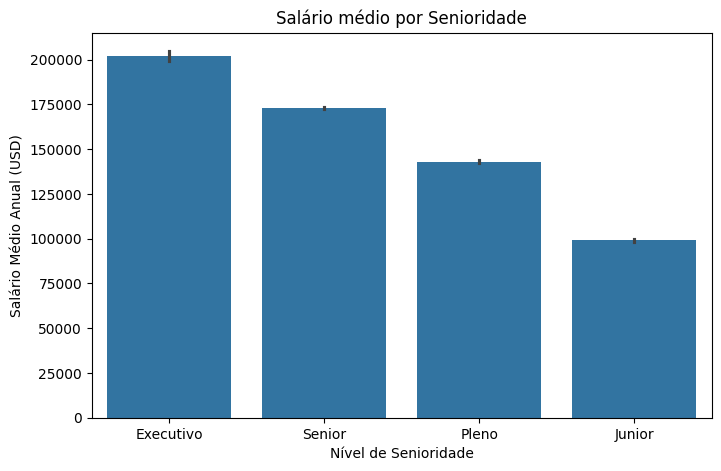

In [160]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem)
plt.title('Salário médio por Senioridade')
plt.xlabel('Nível de Senioridade')
plt.ylabel('Salário Médio Anual (USD)')
plt.show()

In [161]:
ordem1 = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True).index
ordem1

Index(['Junior', 'Pleno', 'Senior', 'Executivo'], dtype='object', name='senioridade')

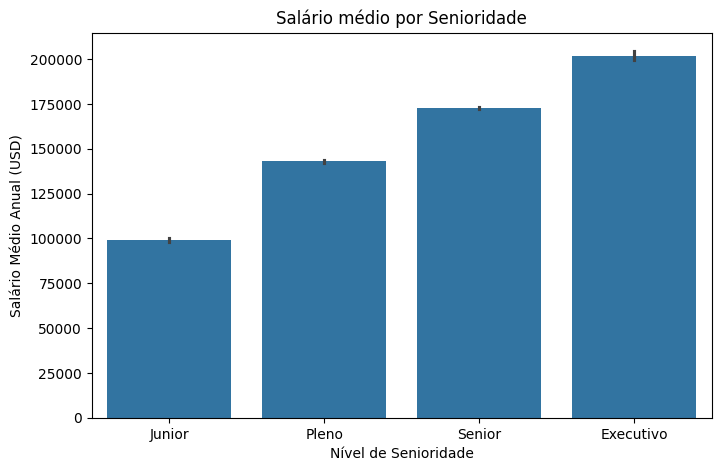

In [162]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem1)
plt.title('Salário médio por Senioridade')
plt.xlabel('Nível de Senioridade')
plt.ylabel('Salário Médio Anual (USD)')
plt.show()

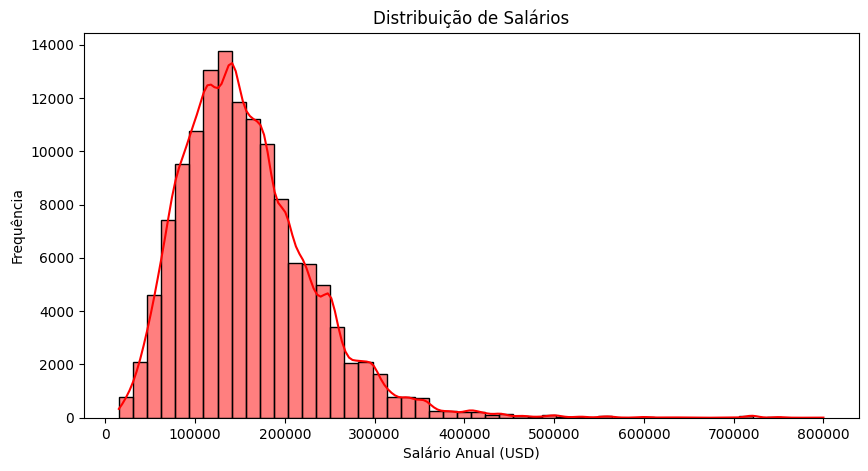

In [163]:
plt.figure(figsize=(10, 5))
sns.histplot(df_limpo['usd'], bins=50, kde=True, color = 'Red')
plt.title('Distribuição de Salários')
plt.xlabel('Salário Anual (USD)')
plt.ylabel('Frequência')
plt.show()

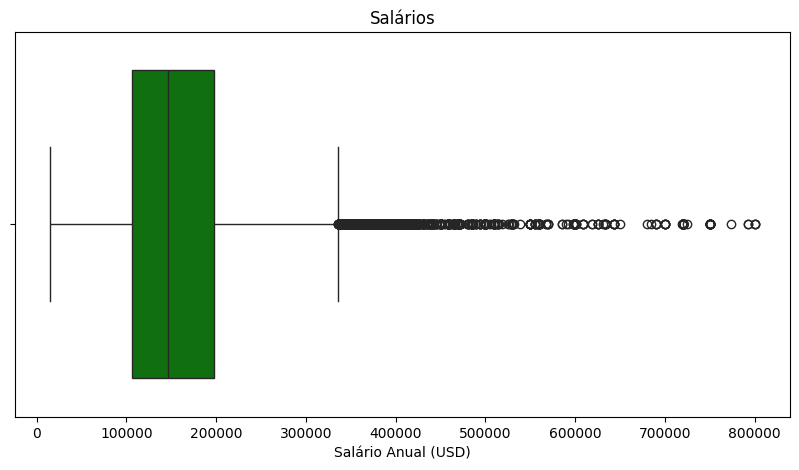

In [164]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_limpo['usd'], color = 'g')
plt.title('Salários')
plt.xlabel('Salário Anual (USD)')
plt.show()

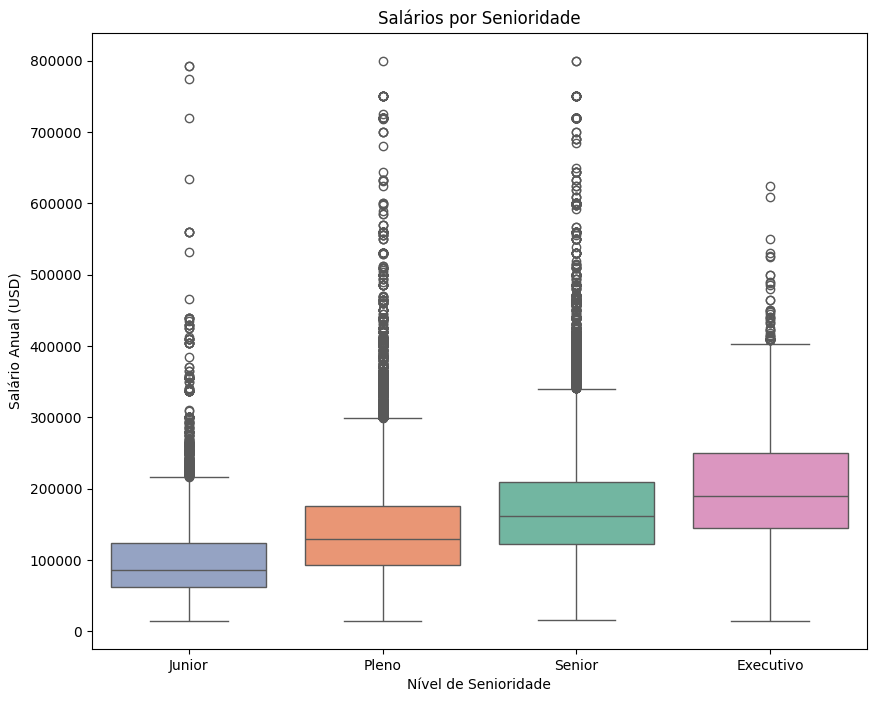

In [165]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']
plt.figure(figsize=(10, 8))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade' )
plt.title('Salários por Senioridade')
plt.xlabel('Nível de Senioridade')
plt.ylabel('Salário Anual (USD)')
plt.show()

In [166]:
import plotly.express as px

In [167]:
df_senioridade_media = df_limpo.groupby('senioridade')['usd'].mean().reset_index()
fig = px.bar(df_senioridade_media, x='senioridade', y='usd', title='Média Salarial por Senioridade (USD)',
             labels={'senioridade': 'Nível de Senioridade', 'usd': 'Salário Médio Anual (USD)'})
fig.show()

In [168]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']
fig = px.pie(remoto_contagem, names='tipo_trabalho',
             values='quantidade',
             title='Proporção de Tipo de Trabalho Remoto',
             hole=0.5)
fig.update_traces(textinfo='percent+label')
fig.show()

**Desafio** - Fazer um gráfico interativo para visualizar o salário médio por país de profissionais de Data Science.

In [169]:
df.residencia.unique()

array(['US', 'AU', 'CA', 'JP', 'GB', 'MX', 'NL', 'ES', 'FR', 'MT', 'IT',
       'LT', 'PH', 'NZ', 'DE', 'LV', 'IE', 'MK', 'AT', 'PL', 'SK', 'BR',
       'SI', 'FI', 'HK', 'LS', 'IN', 'JM', 'CH', 'BE', 'ID', 'PE', 'SG',
       'PT', 'HU', 'RO', 'AR', 'ZA', 'PA', 'EE', 'LU', 'DZ', 'EG', 'CL',
       'GR', 'KE', 'CD', 'SE', 'KR', 'TW', 'NO', 'CZ', 'TR', 'NG', 'CY',
       'CO', 'DK', 'AE', 'BG', 'JO', 'RS', 'UA', 'PR', 'SV', 'EC', 'DO',
       'MY', 'XK', 'CR', 'ZM', 'AM', 'RW', 'IL', 'LB', 'HR', 'PK', 'HN',
       'VE', 'BM', 'VN', 'GE', 'SA', 'OM', 'BA', 'UG', 'MU', 'TH', 'QA',
       'RU', 'TN', 'GH', 'AD', 'MD', 'UZ', 'CF', 'KW', 'IR', 'AS', 'CN',
       'BO', 'IQ', 'JE'], dtype=object)

In [170]:
residencia = {
    'US': 'Estados Unidos',
    'GB': 'Reino Unido',
    'IN': 'Índia',
    'CA': 'Canadá',
    'DE': 'Alemanha',
    'FR': 'França',
    'ES': 'Espanha',
    'RU': 'Rússia',
    'BR': 'Brasil',
    'TR': 'Turquia',
    'MX': 'México',
    'CH': 'Suíça',
    'NL': 'Holanda',
    'DK': 'Dinamarca',
    'IS': 'Islândia',
    'SE': 'Suécia',
    'NO': 'Noruega',
    'AU': 'Austrália',
    'IE': 'Irlanda',
    'JP': 'Japão',
    'MY': 'Malásia',
    'PL': 'Polônia',
    'PT': 'Portugal',
    'SG': 'Singapura',
    'HK': 'Hong Kong',
    'GR': 'Grécia',
    'CZ': 'Checa',
    'HU': 'Hungria',
    'RO': 'Romênia',
    'MT': 'Malta',
    'LT': 'Lituânia',
    'PH': 'Filipinas',
    'NZ': 'Nova Zelândia',
    'LV': 'Letônia',
    'MK': 'Macedônia do Norte',
    'AT': 'Áustria',
    'SK': 'Eslováquia',
    'SI': 'Eslovênia',
    'FI': 'Finlândia',
    'LS': 'Lesoto',
    'JM': 'Jamaica',
    'BE': 'Bélgica',
    'PE': 'Peru',
    'IT': 'Itália',
    'AR': 'Argentina',
    'ZA': 'África do Sul',
    'PA': 'Panamá',
    'EE': 'Estônia',
    'LU': 'Luxemburgo',
    'DZ': 'Argélia',
    'EG': 'Egito',
    'CL': 'Chile',
    'KE': 'Quênia',
    'CD': 'República Democrática do Congo',
    'SE': 'Suécia',
    'KR': 'Coreia do Sul',
    'TW': 'Taiwan',
    'NO': 'Noruega',
    'CZ': 'Checa',
    'TR': 'Turquia',
    'CY': 'Chipre',
    'CO': 'Colômbia',
    'DK': 'Dinamarca',
    'AE': 'Emirados Árabes Unidos',
    'BG': 'Bulgária',
    'ID': 'Indonésia',
    'JO': 'Jordânia',
    'RS': 'Sérvia',
    'UA': 'Ucrânia',
    'PR': 'Porto Rico',
    'SV': 'El Salvador',
    'EC': 'Equador',
    'DO': 'República Dominicana',
    'MY': 'Malásia',
    'XK': 'Kosovo',
    'CR': 'Costa Rica',
    'ZM': 'Zâmbia',
    'AM': 'Armênia',
    'IL': 'Israel',
    'LB': 'Líbano',
    'NG': 'Nigéria',
    'HR': 'Croácia',
    'PK': 'Paquistão',
    'HN': 'Honduras',
    'VE': 'Venezuela',
    'AS': 'Samoa Americana',
    'SA': 'Arábia Saudita',
    'OM': 'Omã',
    'BA': 'Bósnia e Herzegovina',
    'VN': 'Vietnã',
    'GI': 'Gibraltar',
    'MU': 'Maurício',
    'RU': 'Rússia',
    'QA': 'Catar',
    'GH': 'Gana',
    'AD': 'Andorra',
    'CF': 'República Centro-Africana',
    'TH': 'Tailândia',
    'IR': 'Irã',
    'BS': 'Bahamas',
    'IQ': 'Iraque',
    'CN': 'China',
    'MD': 'Moldávia'
}
df['residencia'] = df['residencia'].replace(residencia)

display(df['residencia'].value_counts())

,count
residencia,
Estados Unidos,119579
Canadá,5238
Reino Unido,3711
Austrália,517
Holanda,404
...,...
KW,1
Samoa Americana,1
China,1


In [171]:
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
df_ds_pais = df_ds.groupby(df['residencia'])['usd'].mean().reset_index()
df_ds_pais = df_ds_pais.sort_values('usd', ascending=True)

fig = px.bar(df_ds_pais, x='residencia', y='usd',
             title='Salário Médio de Cientista de Dados por País (USD)',
             labels={'residencia': 'País''', 'usd': 'Salário Médio Anual (USD)'},
             color='residencia',
             color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(showlegend=False)

fig.update_traces(width=0.6)

fig.update_layout(title_x=0.5, title_font_size=24)

fig.update_xaxes(tickangle=270)

fig.show()